In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = '/media/sf_repo/kdd2/image/'


In [2]:
def rgb2gray(rgb):
#    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    return np.dot(rgb[...,:3], [0.2125, 0.7154, 0.0721])


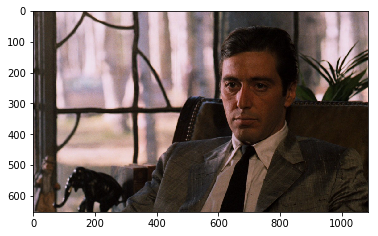

In [3]:
img = mpimg.imread(path + 'michael-corleone2.png',0)
imgplot = plt.imshow(img)

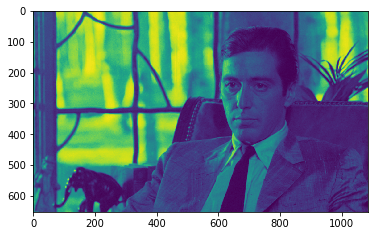

In [4]:
gray = rgb2gray(img)    
imgplot = plt.imshow(gray)

In [5]:
print('Original', img.shape)
print('Reduzido', gray.shape)

Original (652, 1086, 3)
Reduzido (652, 1086)


In [6]:
u, s, v = np.linalg.svd(gray)

In [7]:
print('Check', np.allclose(gray, np.dot(u * s, v[:u.shape[0],:])))

Check True


In [8]:
print ('Shape U->', u.shape)
print ('Shape S->', s.shape)
print ('Shape V->', v.shape)

Shape U-> (652, 652)
Shape S-> (652,)
Shape V-> (1086, 1086)


In [9]:
def reduction(threesold = 0.8):
    energy = 0
    energy_total = np.sum(s)
    for i in range(0,s.shape[0]):
        energy += s[i] 
        #print(s[i],energy, energy / energy_total)
        if energy / energy_total >= threesold:
            return i

In [34]:
sizes =  [0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 0.99999999999]
redux = []

for z in sizes:
    redux.append(reduction(z))


In [39]:
for i in range(0,len(redux)):
    print('Proportion:', sizes[i], 'SV:' , redux[i])


Proportion: 0.6 SV: 15
Proportion: 0.7 SV: 28
Proportion: 0.75 SV: 37
Proportion: 0.8 SV: 50
Proportion: 0.85 SV: 71
Proportion: 0.9 SV: 109
Proportion: 0.95 SV: 198
Proportion: 0.99 SV: 399
Proportion: 0.99999999999 SV: 651


In [31]:
recimg = []
for e in redux:
    recimg.append(np.dot(u[:,:e] * s[:e], v[:e,:]))


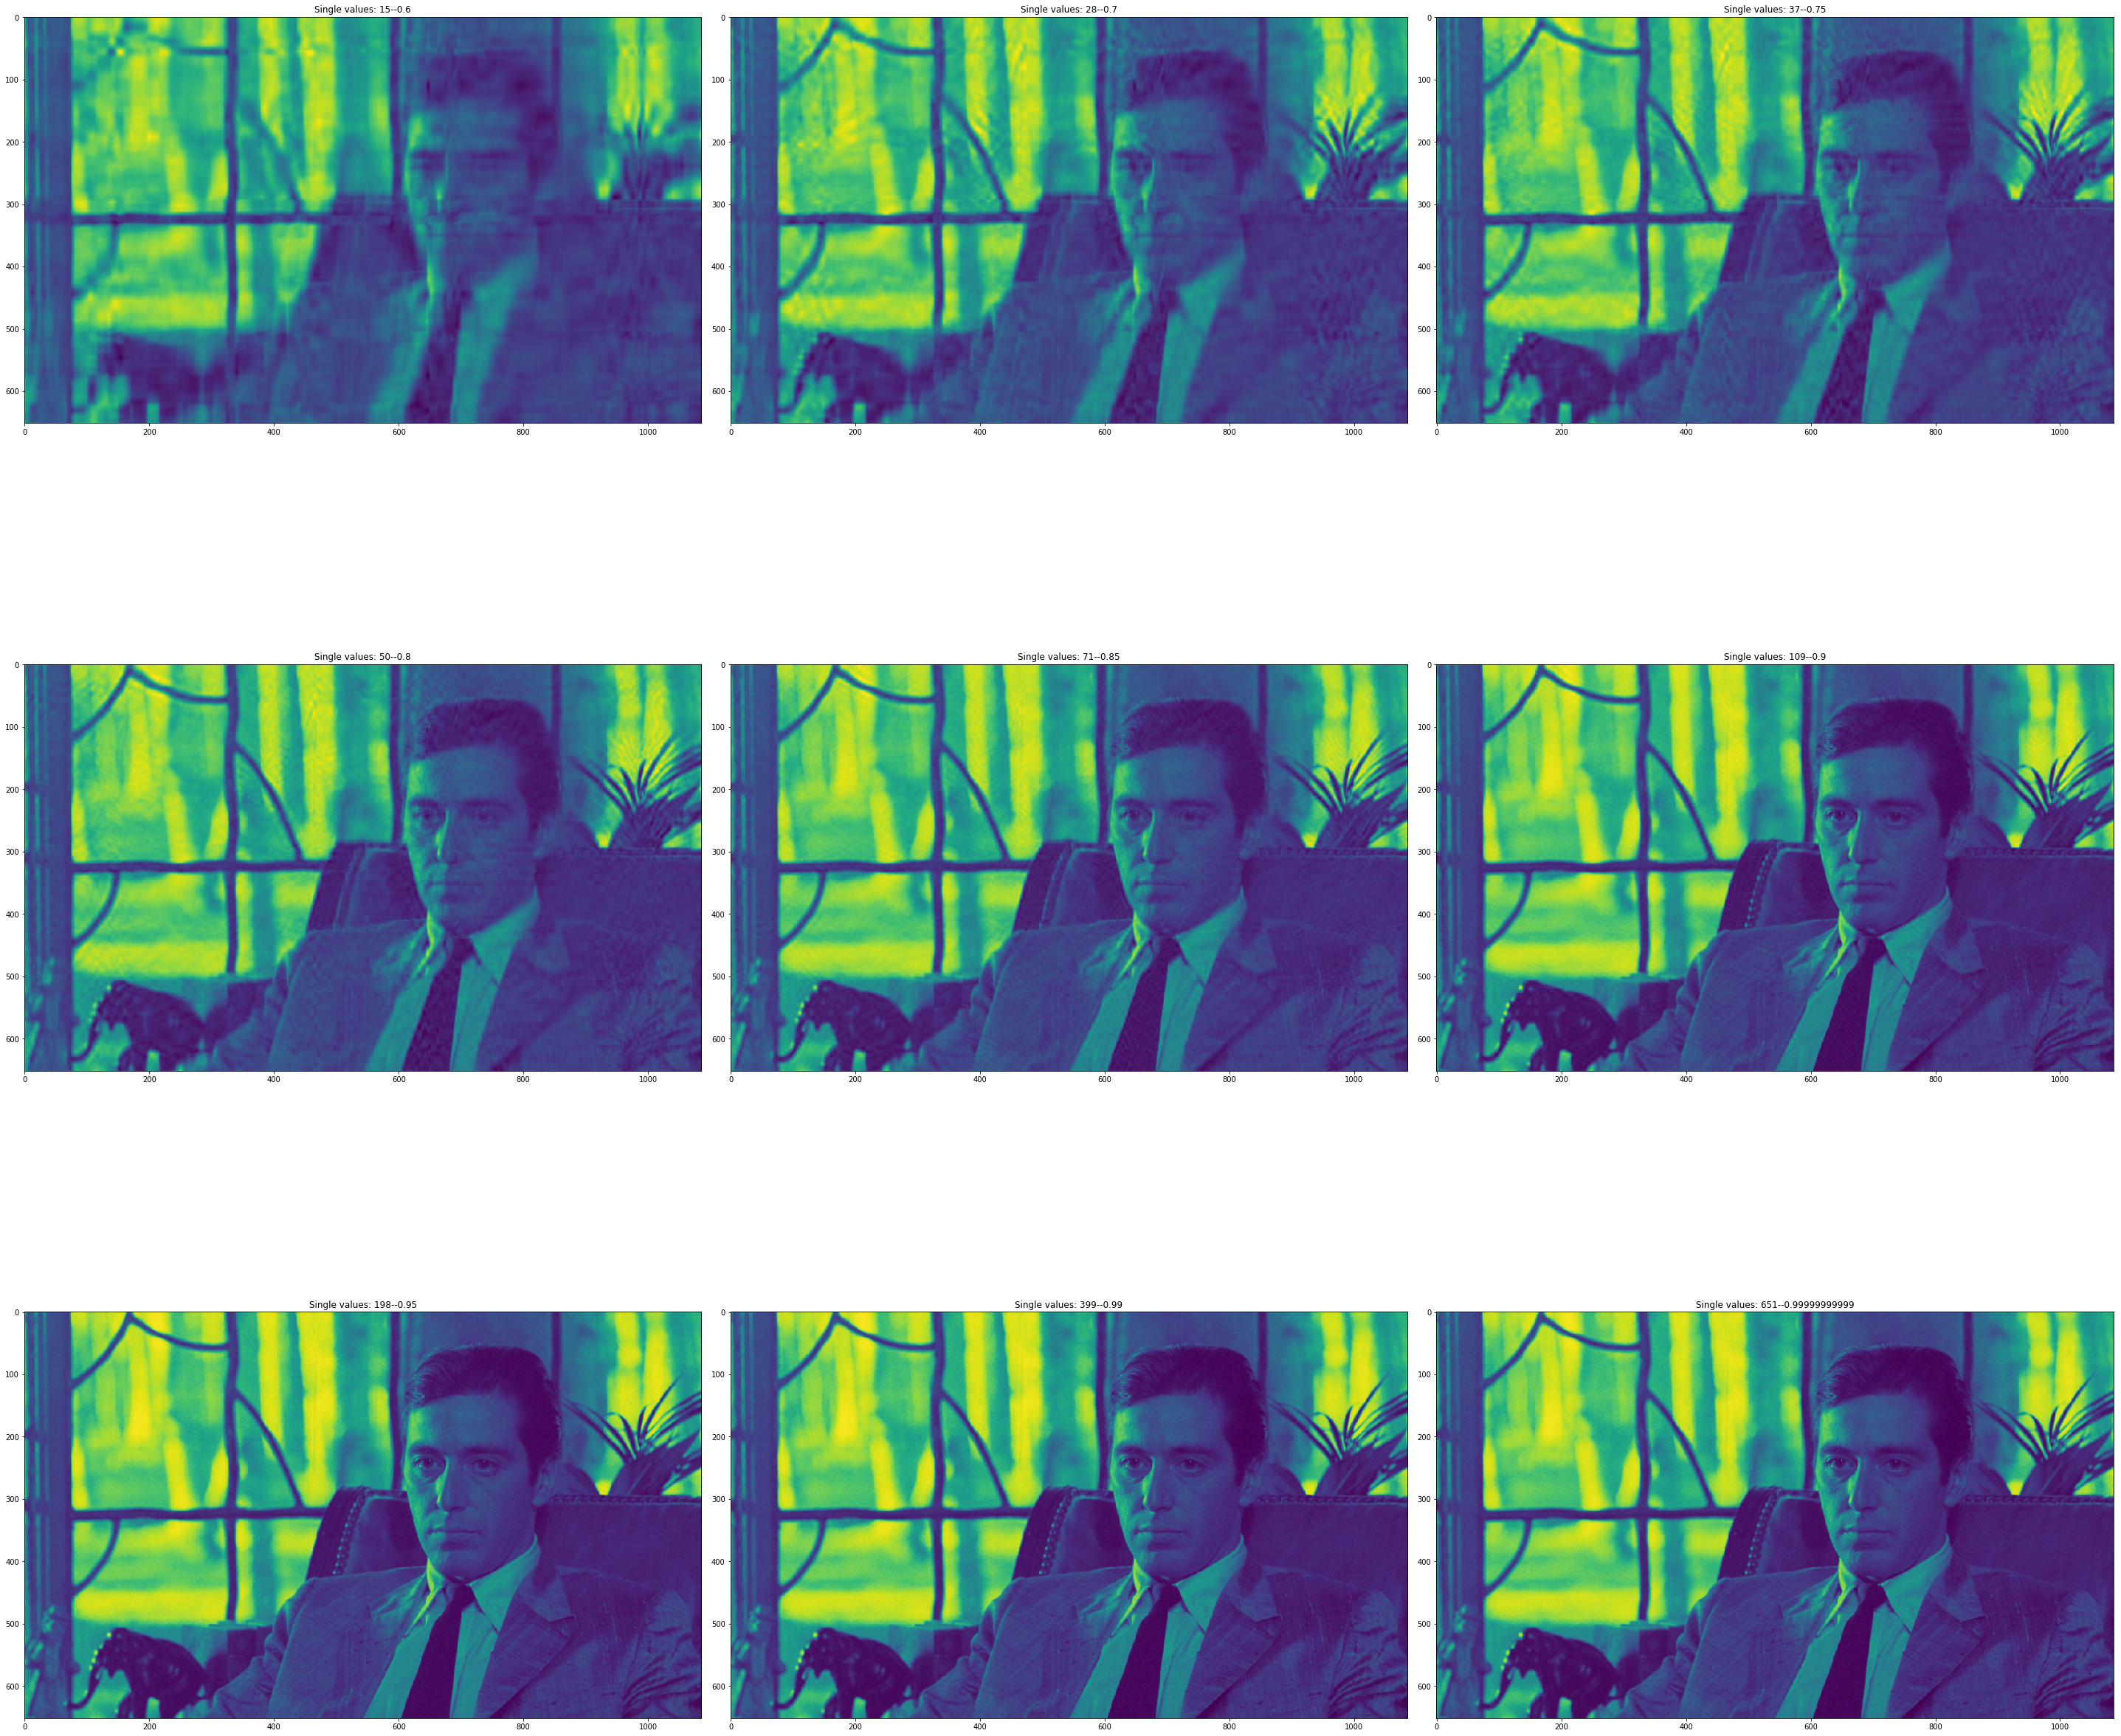

In [41]:
fig=plt.figure(figsize=(40, 50))
columns = 3
rows = int(len(recimg) / columns) + 1 
for j in range(0, len(recimg)):
    f = fig.add_subplot(rows, columns, j+1)
    f.title.set_text('Single values: ' + str(redux[j]) + '--' +  str(sizes[j]))
    plt.imshow(recimg[j])
plt.tight_layout(True)
plt.show()